# Statistical Learning Project 2 - Insurance Premium Detection


### Objective :-
-----------------
We want to see if we can dive deep into this data to find some valuable insights.

### Steps and Tasks :-
---------------------------

1. Import the necessary libraries

2. Read the data as a data frame

3. Perform basic EDA which should include the following and print out your insights at every step.

		a. Shape of the data
		
		b. Data type of each attribute
		
		c. Checking the presence of missing values
		
		d. 5 point summary of numerical attributes
		
		e. Distribution of ‘bmi’, ‘age’ and ‘charges’ columns.
		
		f. Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns
		
		g. Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns
		
		h. Distribution of categorical columns (include children)
		
		i. Pair plot that includes all the columns of the data frame

    
4. Answer the following questions with statistical evidence

		a. Do charges of people who smoke differ significantly from the people who don't ?

		b. Does bmi of males differ significantly from that of females ?

		c. Is the proportion of smokers significantly different in different genders ?

		d. Is the distribution of bmi across women with no children, one child and two children, the same ?


In [2]:
#Import all the necessary modules

# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

# Importing ploting libraries
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

# Importing seaborn for statistical plots
import seaborn as sns

import pandas as pd
import numpy as np

In [3]:
# Load the data from CSV file into a dataframe
colnames = ["Age" , "Sex" , "BMI" , "Children" , "Smoker" , "Region" , "Charges"]

insurance_df = pd.read_csv("insurance.csv", names = colnames , skiprows = 1)
insurance_df.head()

,Age,Sex,BMI,Children,Smoker,Region,Charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
insurance_df.shape

(1338, 7)

In [5]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
Age         1338 non-null int64
Sex         1338 non-null object
BMI         1338 non-null float64
Children    1338 non-null int64
Smoker      1338 non-null object
Region      1338 non-null object
Charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [6]:
insurance_df.dtypes

Age           int64
Sex          object
BMI         float64
Children      int64
Smoker       object
Region       object
Charges     float64
dtype: object

In [7]:
insurance_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
BMI,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
Children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
Charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [8]:
insurance_df.describe(include="all").transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,1338,NaN,NaN,NaN,39.207,14.05,18,27,39,51,64
Sex,1338,2,male,676,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BMI,1338,NaN,NaN,NaN,30.6634,6.09819,15.96,26.2963,30.4,34.6938,53.13
Children,1338,NaN,NaN,NaN,1.09492,1.20549,0,0,1,2,5
Smoker,1338,2,no,1064,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Region,1338,4,southeast,364,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Charges,1338,NaN,NaN,NaN,13270.4,12110,1121.87,4740.29,9382.03,16639.9,63770.4


In [10]:
# To check for any missing data
insurance_df.isnull().sum()

Age         0
Sex         0
BMI         0
Children    0
Smoker      0
Region      0
Charges     0
dtype: int64

In [11]:
# To check for any missing data
insurance_df.isna().sum()

Age         0
Sex         0
BMI         0
Children    0
Smoker      0
Region      0
Charges     0
dtype: int64

In [12]:
# To check if all the data values are real or not
insurance_df[~insurance_df.applymap(np.isreal).all(1)]

,Age,Sex,BMI,Children,Smoker,Region,Charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


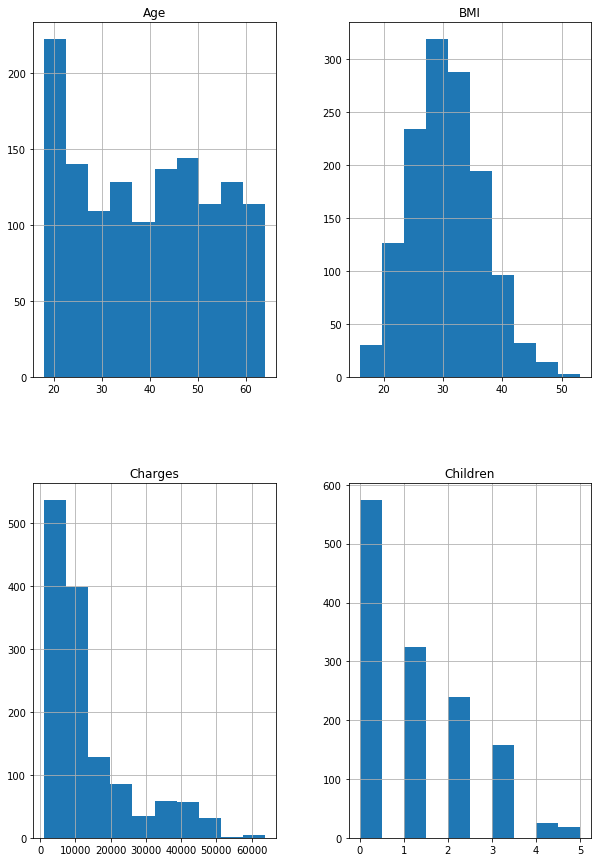

In [15]:
insurance_df.hist(figsize=(10,15))
plt.draw()

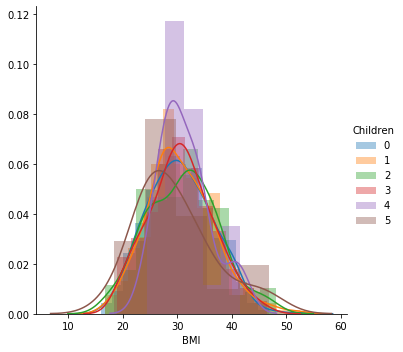

In [16]:
# Distribution plots with different columns combinations
sns.FacetGrid(insurance_df,hue="Children",height=5).map(sns.distplot,"BMI").add_legend()
plt.show()

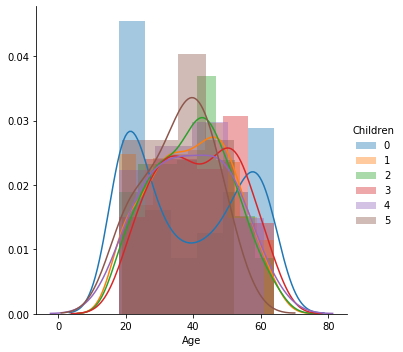

In [17]:
# Distribution plots with different columns combinations
sns.FacetGrid(insurance_df,hue="Children",height=5).map(sns.distplot,"Age").add_legend()
plt.show()

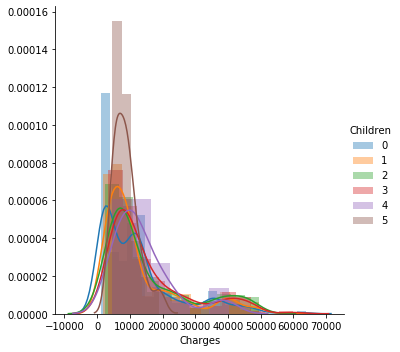

In [18]:
# Distribution plots with different columns combinations
sns.FacetGrid(insurance_df,hue="Children",height=5).map(sns.distplot,"Charges").add_legend()
plt.show()

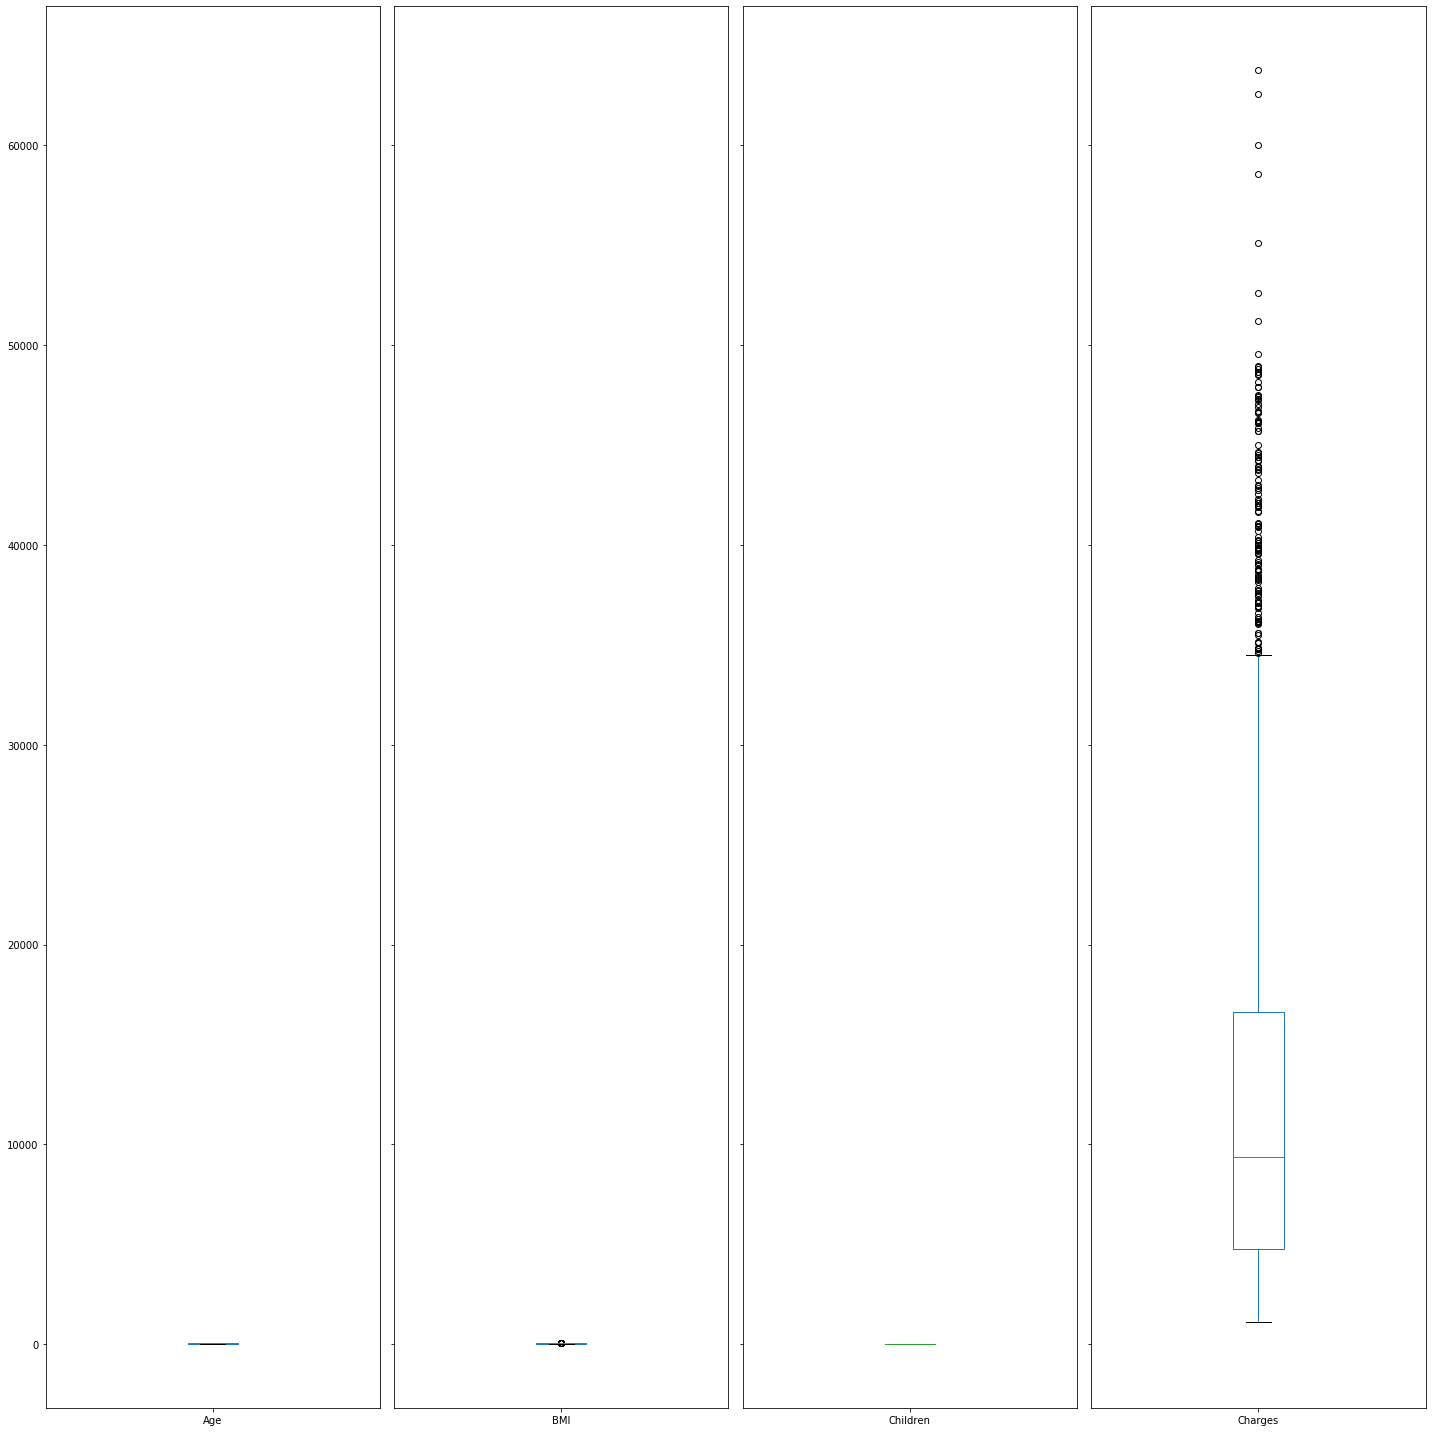

In [19]:
# Boxplot for viewing some statical values of all columns
insurance_df.plot(kind='box', subplots=True, sharex=True, sharey=True, figsize=(20,20))
plt.tight_layout()
plt.show()
print("Charges Column Data Has Many Outliers Values")

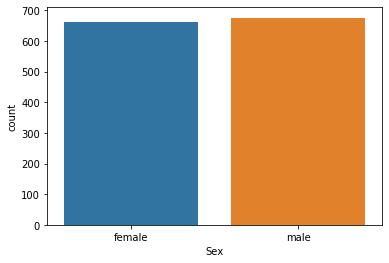

In [20]:
sns.countplot(insurance_df['Sex'])

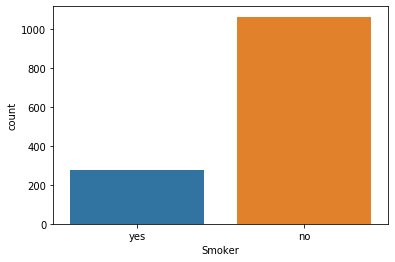

In [21]:
sns.countplot(insurance_df['Smoker'])

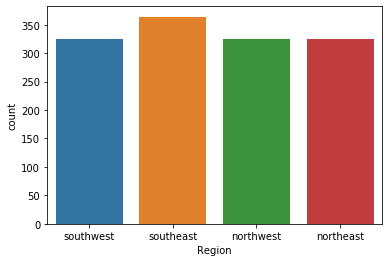

In [22]:
sns.countplot(insurance_df['Region'])

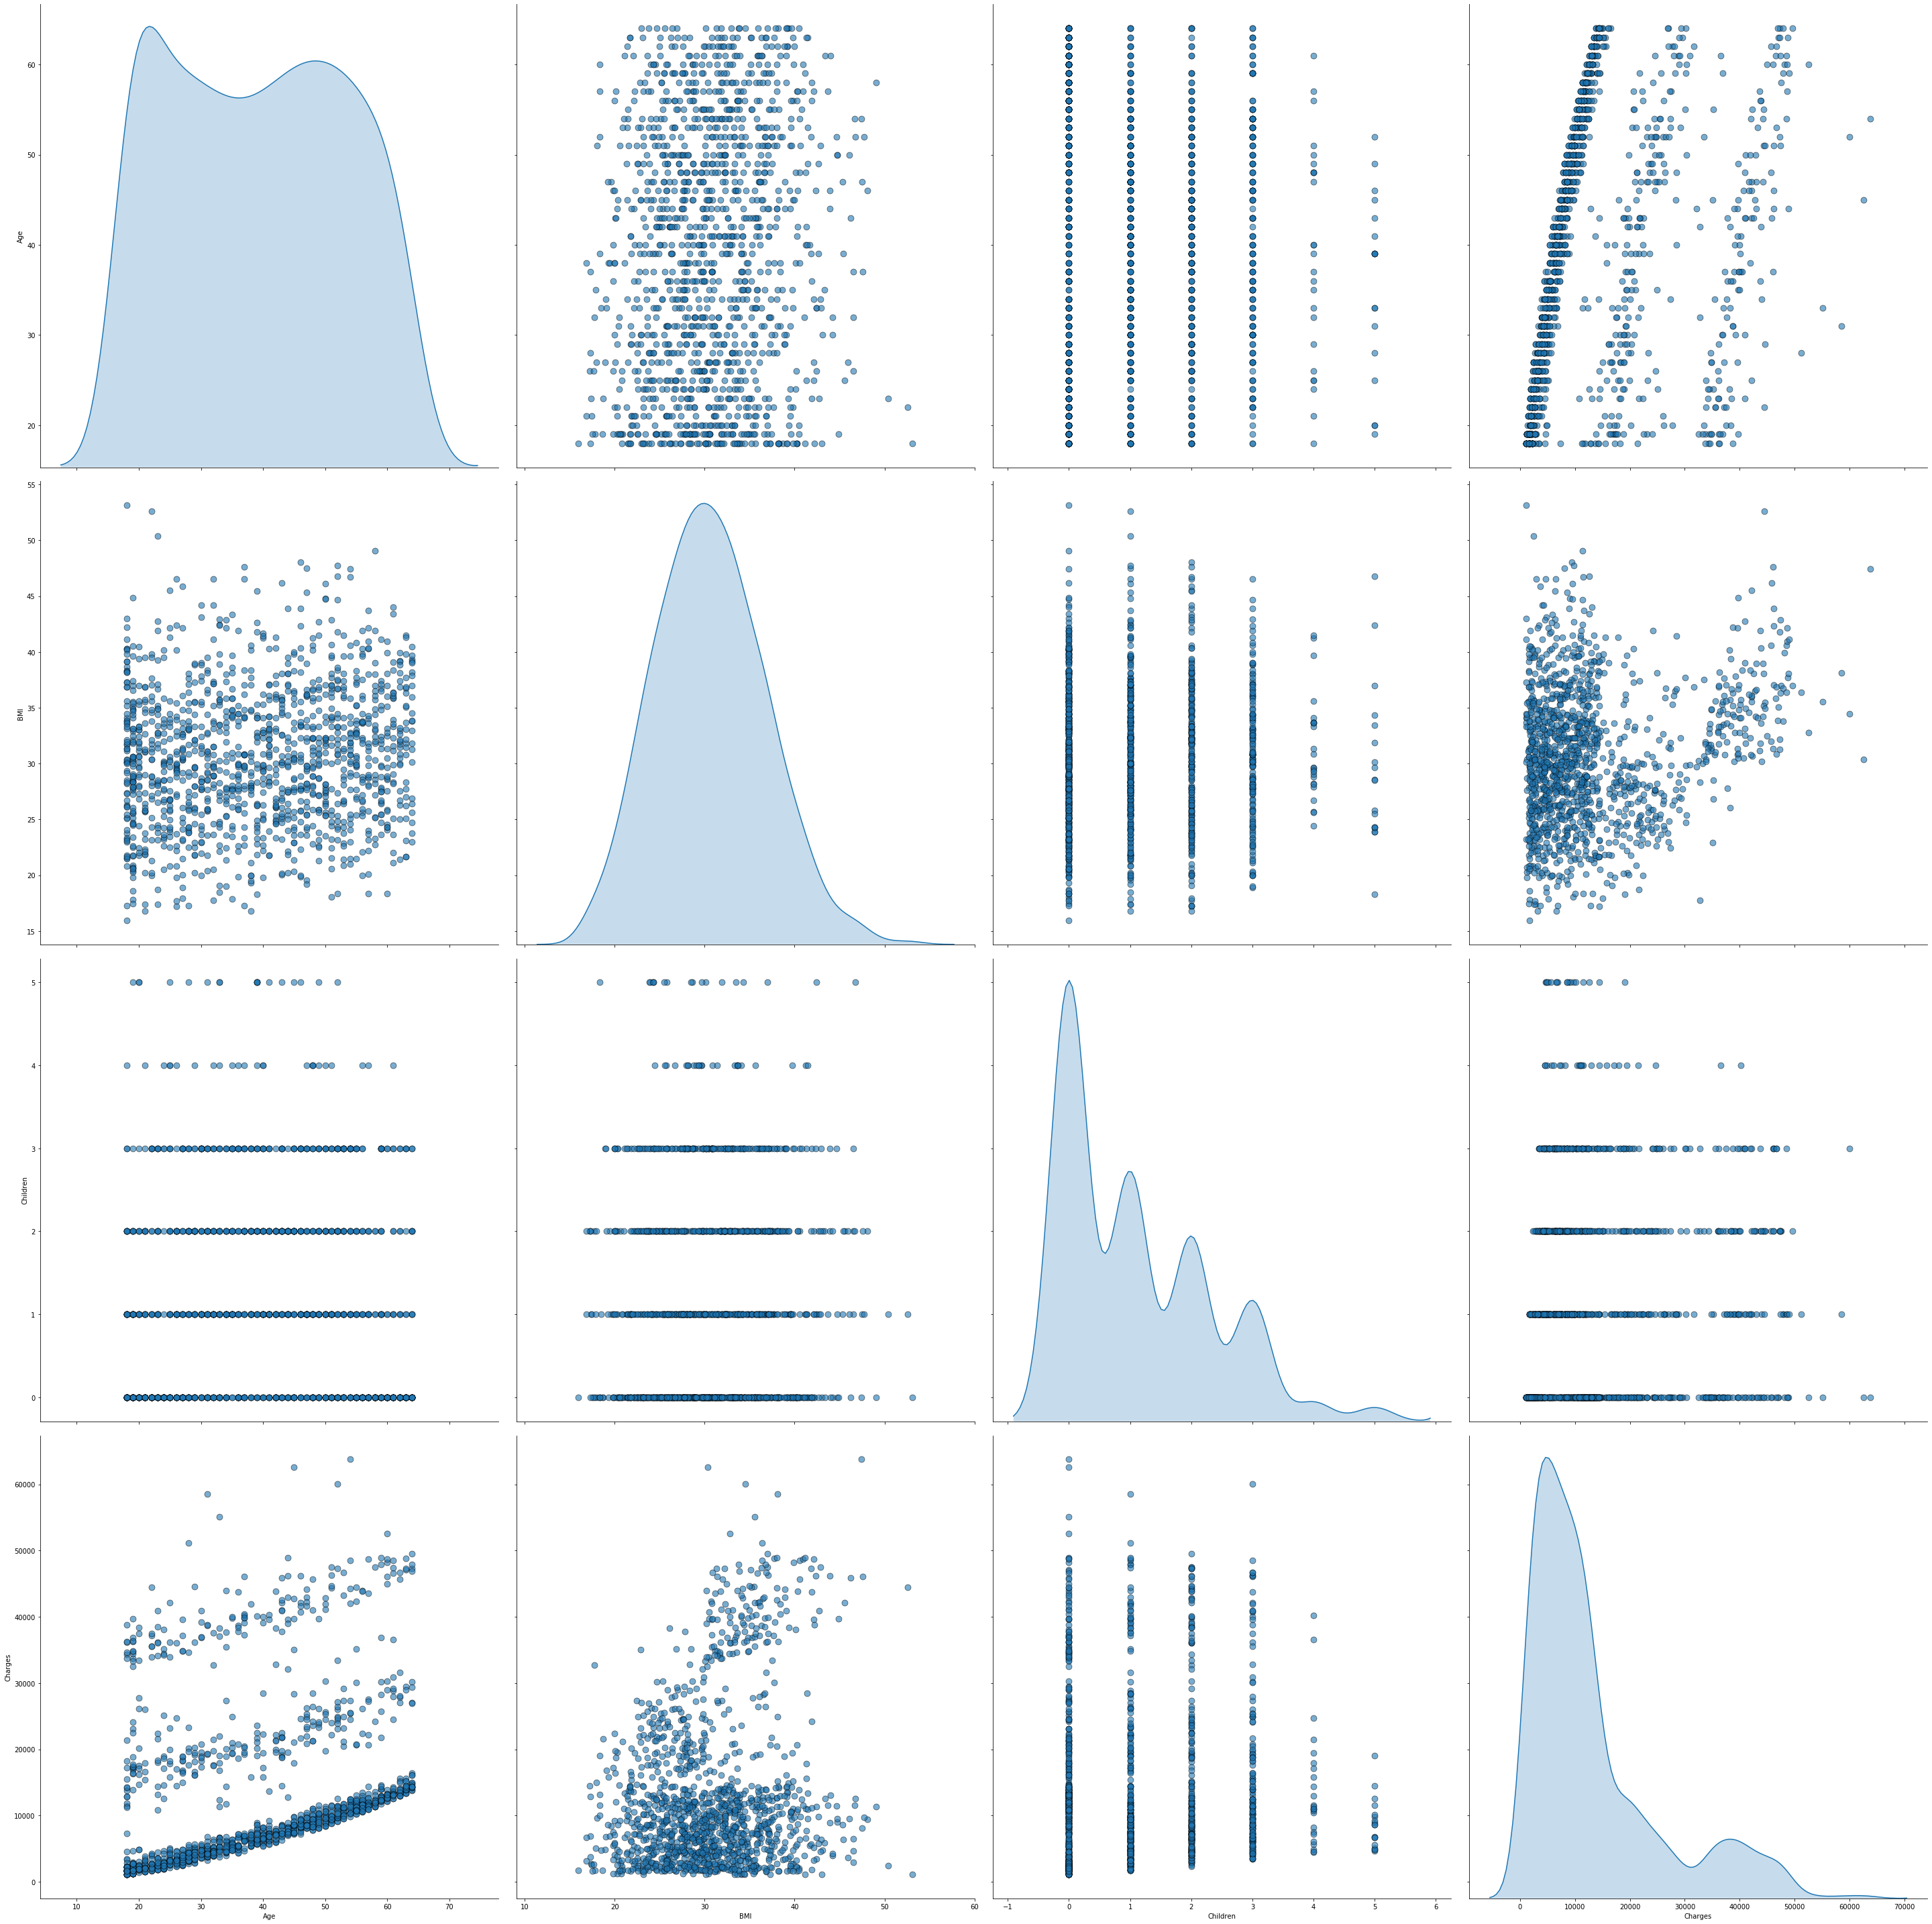

In [23]:
# Multivariate Analysis - pairplot to check all columns relations 
sns.pairplot(insurance_df, diag_kind='kde', plot_kws={'alpha': 0.6, 's': 80, 'edgecolor': 'k'}, height=10)
plt.show()

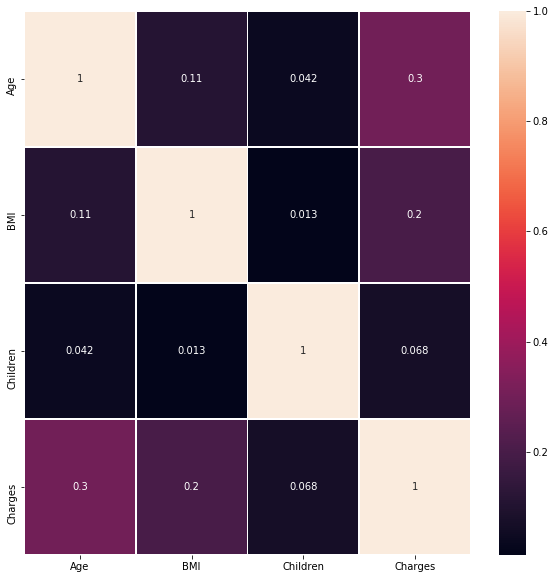

In [25]:
# To better visualize the volume of events within a dataset
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(insurance_df.corr(), annot=True, linewidths=.5, ax=ax)
plt.show()

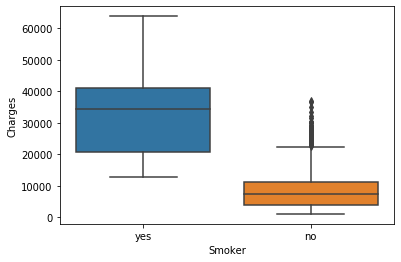

From the plot it is clearly evident charges of people who smoke differ significantly from the people who don't


In [28]:
# Boxplot to show relation of particular column against the Charges column
sns.boxplot(x='Smoker', y='Charges', data=insurance_df)
plt.show()
print("From the plot it is clearly evident charges of people who smoke differ significantly from the people who don't")

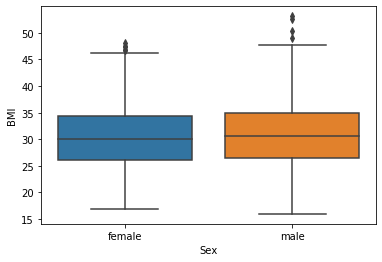

From the plot it is clearly evident that BMI is similar between males and females


In [29]:
# Boxplot to show relation of particular column against the BMI column
sns.boxplot(x='Sex', y='BMI', data=insurance_df)
plt.show()
print("From the plot it is clearly evident that BMI is similar between males and females")

In [30]:
def categorical_summarized(dataframe, x=None, y=None, hue=None, palette='Set1', verbose=True):
    '''
    Helper function that gives a quick summary of a given column of Categorical Data Arguments
    =========
    dataframe: pandas dataframe
    x: str. horizontal axis to plot the labels of categorical data, y would be the count
    y: str. vertical axis to plot the labels of categorical data, x would be the count
    hue: str. if you want to compare it another variable (usually the target variable)
    palette: array-like. Colour of the plot
    Returns
    =======
    Quick Stats of the data and also the count plot
    '''
    if x == None:
        column_interested = y
    else:
        column_interested = x
    series = dataframe[column_interested]
    print(series.describe())
    print('mode: ', series.mode())
    if verbose:
        print('='*80)
        print(series.value_counts())

    g=sns.countplot(x=x, y=y, hue=hue, data=dataframe, palette=palette)
    g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
    plt.show()

count     1338
unique       2
top       male
freq       676
Name: Sex, dtype: object
mode:  0    male
dtype: object
male      676
female    662
Name: Sex, dtype: int64


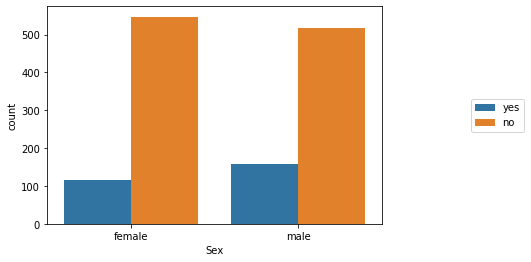

From the plot it is clearly evident that the proportion of smokers is significantly higher in males than in females


In [31]:
c_palette = ['tab:blue', 'tab:orange']
categorical_summarized(insurance_df, x = 'Sex', hue='Smoker', palette=c_palette)
print("From the plot it is clearly evident that the proportion of smokers is significantly higher in males than in females")

In [32]:
insurance_df['Children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: Children, dtype: int64

In [33]:
insurance_df[insurance_df.Children<3]

,Age,Sex,BMI,Children,Smoker,Region,Charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692
10,25,male,26.220,0,no,northeast,2721.32080
11,62,female,26.290,0,yes,southeast,27808.72510


In [34]:
children_subset=insurance_df[insurance_df.Children<3]

In [35]:
children_subset

,Age,Sex,BMI,Children,Smoker,Region,Charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692
10,25,male,26.220,0,no,northeast,2721.32080
11,62,female,26.290,0,yes,southeast,27808.72510


count    1138.000000
mean        0.706503
std         0.793538
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         2.000000
Name: Children, dtype: float64
mode:  0    0
dtype: int64
0    574
1    324
2    240
Name: Children, dtype: int64


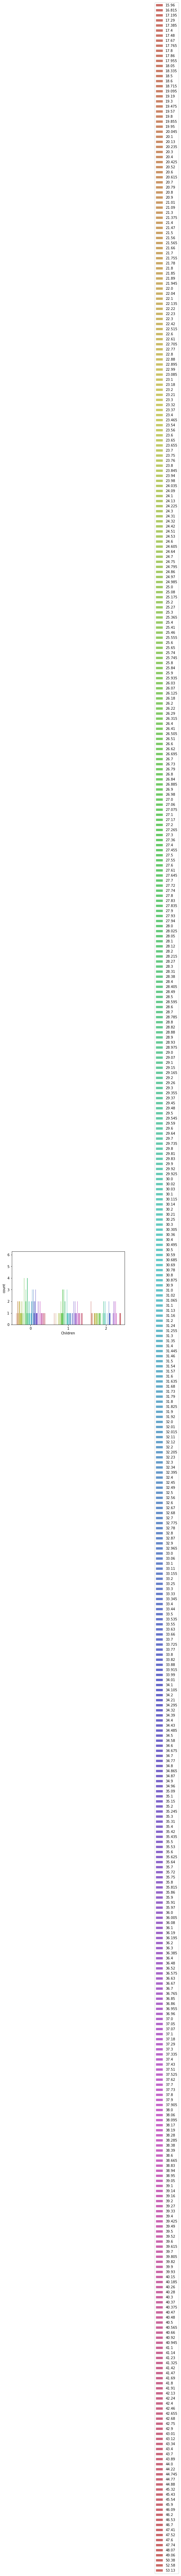

From the plot it is clearly evident that the distribution of BMI varies significantly as the number of children increases 


In [41]:
categorical_summarized(children_subset, x = 'Children', hue='BMI', palette='hls')
print("From the plot it is clearly evident that the distribution of BMI varies significantly as the number of children increases ")

In [37]:
def quantitative_summarized(dataframe, x=None, y=None, hue=None, palette='Set1', ax=None, verbose=True, swarm=False):
    '''
    Helper function that gives a quick summary of Quantattive Data Arguments
    =========
    dataframe: pandas dataframe
    x: str. horizontal axis to plot the labels of categorical data (usually the target variable)
    y: str. vertical axis to plot the quantitative data
    hue: str. if you want to compare it another categorical variable (usually the target variable if x is another variable)
    palette: array-like. Colour of the plot
    swarm: if swarm is set to True, a swarm plot would be overlayed
    Returns
    =======
    Quick Stats of the data and also the box plot of the distribution
    '''
    series = dataframe[y]
    print(series.describe())
    print('mode: ', series.mode())
    if verbose:
        print('='*80)
        print(series.value_counts())

    sns.boxplot(x=x, y=y, hue=hue, data=dataframe, palette=palette, ax=ax)

    if swarm:
        sns.swarmplot(x=x, y=y, hue=hue, data=dataframe,
                      palette=palette, ax=ax)

    plt.show()

count    1138.000000
mean        0.706503
std         0.793538
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         2.000000
Name: Children, dtype: float64
mode:  0    0
dtype: int64
0    574
1    324
2    240
Name: Children, dtype: int64


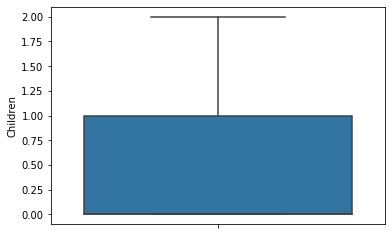

In [38]:
quantitative_summarized(dataframe=children_subset, y = 'Children', hue='BMI', palette=c_palette, verbose=True, swarm=False)

count    1138.000000
mean        0.706503
std         0.793538
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         2.000000
Name: Children, dtype: float64
mode:  0    0
dtype: int64


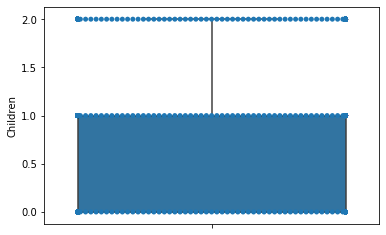

In [39]:
quantitative_summarized(dataframe=children_subset, y = 'Children', hue='BMI', palette=c_palette, verbose=False, swarm=True)

In [40]:
print("That's All Folks !!! ")

That's All Folks !!! 
